# `008-logistic-regression-pytorch`

Task: Fit a logistic regression model using PyTorch and fastai's Learner class.

## Setup

In [1]:
!pip install -Uq fastbook

In [3]:
from fastai.vision.all import *
import sklearn.datasets

## Task

## Solution

Add code and Markdown cells for each of the listed tasks above.

In [196]:
iris = sklearn.datasets.load_iris()

In [197]:
# based on https://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html#sphx-glr-auto-examples-classification-plot-classification-probability-py
# and https://scikit-learn.org/stable/auto_examples/linear_model/plot_sgd_iris.html#sphx-glr-auto-examples-linear-model-plot-sgd-iris-py
X = torch.tensor(iris.data).float()#[:, 0:2]  # use the first two features
y = iris.target

n_features = X.shape[1]

In [198]:
splitter = RandomSplitter(seed = 2021032)

In [199]:
data = L(zip(X, y))

In [200]:
train_indices, valid_indices = splitter(data)

In [201]:
len(train_indices)

120

In [202]:
train_dl = DataLoader(data[train_indices], batch_size=20)
batch = train_dl.one_batch(); batch

(tensor([[6.7000, 3.3000, 5.7000, 2.1000],
         [5.0000, 3.2000, 1.2000, 0.2000],
         [6.0000, 2.2000, 4.0000, 1.0000],
         [5.1000, 3.3000, 1.7000, 0.5000],
         [5.0000, 2.0000, 3.5000, 1.0000],
         [6.1000, 3.0000, 4.6000, 1.4000],
         [4.3000, 3.0000, 1.1000, 0.1000],
         [6.3000, 2.7000, 4.9000, 1.8000],
         [5.1000, 3.4000, 1.5000, 0.2000],
         [5.6000, 3.0000, 4.1000, 1.3000],
         [4.8000, 3.0000, 1.4000, 0.1000],
         [5.5000, 3.5000, 1.3000, 0.2000],
         [4.6000, 3.6000, 1.0000, 0.2000],
         [4.9000, 2.5000, 4.5000, 1.7000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [6.0000, 2.2000, 5.0000, 1.5000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [5.7000, 2.5000, 5.0000, 2.0000],
         [7.9000, 3.8000, 6.4000, 2.0000],
         [5.0000, 3.4000, 1.6000, 0.4000]]),
 tensor([2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0]))

In [203]:
valid_dl = DataLoader(data[valid_indices], batch_size=20)

In [221]:
model = nn.Sequential(
    nn.Linear(in_features=4, out_features=100, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=3, bias=True)
)

In [222]:
model(batch[0])

tensor([[ 0.2884,  0.6447, -2.0498],
        [ 0.4437,  0.7707, -1.4257],
        [ 0.3129,  0.6512, -1.7800],
        [ 0.4059,  0.7620, -1.4834],
        [ 0.2271,  0.5641, -1.5151],
        [ 0.2706,  0.6652, -1.8462],
        [ 0.3188,  0.7250, -1.2415],
        [ 0.3025,  0.6168, -1.9151],
        [ 0.4073,  0.8062, -1.4738],
        [ 0.2437,  0.6497, -1.7082],
        [ 0.3774,  0.7509, -1.3793],
        [ 0.5099,  0.8358, -1.5638],
        [ 0.3696,  0.8025, -1.3384],
        [ 0.1440,  0.4862, -1.5273],
        [ 0.3669,  0.6479, -2.0891],
        [ 0.2473,  0.5767, -1.7883],
        [ 0.3243,  0.7205, -1.9369],
        [ 0.2263,  0.5196, -1.7561],
        [ 0.3678,  0.7659, -2.3711],
        [ 0.3921,  0.7781, -1.4573]], grad_fn=<AddmmBackward>)

In [223]:
loss_fn = nn.CrossEntropyLoss()
loss_fn(model(batch[0]), batch[1])

tensor(1.6231, grad_fn=<NllLossBackward>)

In [224]:
learner = Learner(
    dls=DataLoaders(train_dl, valid_dl),
    model=model,
    loss_func=loss_fn,
#    opt_func=SGD,
    wd=1e0,
    metrics=[accuracy],
)

In [225]:
learner.dls.train.one_batch()

(tensor([[6.7000, 3.3000, 5.7000, 2.1000],
         [5.0000, 3.2000, 1.2000, 0.2000],
         [6.0000, 2.2000, 4.0000, 1.0000],
         [5.1000, 3.3000, 1.7000, 0.5000],
         [5.0000, 2.0000, 3.5000, 1.0000],
         [6.1000, 3.0000, 4.6000, 1.4000],
         [4.3000, 3.0000, 1.1000, 0.1000],
         [6.3000, 2.7000, 4.9000, 1.8000],
         [5.1000, 3.4000, 1.5000, 0.2000],
         [5.6000, 3.0000, 4.1000, 1.3000],
         [4.8000, 3.0000, 1.4000, 0.1000],
         [5.5000, 3.5000, 1.3000, 0.2000],
         [4.6000, 3.6000, 1.0000, 0.2000],
         [4.9000, 2.5000, 4.5000, 1.7000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [6.0000, 2.2000, 5.0000, 1.5000],
         [6.4000, 3.2000, 4.5000, 1.5000],
         [5.7000, 2.5000, 5.0000, 2.0000],
         [7.9000, 3.8000, 6.4000, 2.0000],
         [5.0000, 3.4000, 1.6000, 0.4000]]),
 tensor([2, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 0]))

SuggestedLRs(lr_min=0.02089296132326126, lr_steep=1.3182567499825382e-06)

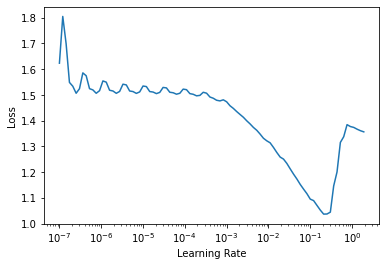

In [226]:
learner.lr_find()

In [227]:
learner.fit(50, lr=.01)

epoch,train_loss,valid_loss,accuracy,time
0,1.160195,0.722888,0.566667,00:00
1,0.887983,0.537561,0.600000,00:00
2,0.755729,0.417399,0.866667,00:00
3,0.663162,0.467274,0.633333,00:00
4,0.605306,0.362129,0.933333,00:00
5,0.557181,0.378005,0.900000,00:00
6,0.519377,0.339745,0.933333,00:00
7,0.486553,0.333866,0.900000,00:00
8,0.458709,0.306879,0.900000,00:00
9,0.433285,0.303225,0.900000,00:00


In [168]:
learner.fit(10, lr=1e-10)

epoch,train_loss,valid_loss,accuracy,time
0,0.473271,0.398137,0.866667,00:00
1,0.473271,0.398137,0.866667,00:00
2,0.473271,0.398137,0.866667,00:00
3,0.473272,0.398137,0.866667,00:00
4,0.473272,0.398137,0.866667,00:00
5,0.473272,0.398137,0.866667,00:00
6,0.473272,0.398137,0.866667,00:00
7,0.473272,0.398137,0.866667,00:00
8,0.473272,0.398137,0.866667,00:00
9,0.473272,0.398137,0.866667,00:00


In [68]:
model.reset_parameters()

In [69]:
import sklearn.linear_model

In [195]:
#clf = sklearn.linear_model.SGDClassifier(
#    loss='log', alpha=0.001, max_iter=100,
#    learning_rate='invscaling', eta0=1e2,
#    verbose=True
#)
clf = sklearn.linear_model.LogisticRegression(C=1.).fit(X[train_indices], y[train_indices])
clf.score(X[valid_indices], y[valid_indices])

0.9666666666666667

In [148]:
clf.intercept_

array([ 7.16029684,  1.47437816, -8.63467499])

In [149]:
clf.coef_

array([[-2.5174083 ,  2.20947286],
       [ 0.5795195 , -1.36721673],
       [ 1.93788879, -0.84225613]])

In [166]:
model.weight.data.copy_(tensor(clf.coef_))

tensor([[-2.5174,  2.2095],
        [ 0.5795, -1.3672],
        [ 1.9379, -0.8423]])

In [167]:
model.bias.data.copy_(tensor(clf.intercept_))

tensor([ 7.1603,  1.4744, -8.6347])

In [92]:
clf.t_

5401.0

In [60]:
clf.n_iter_

45

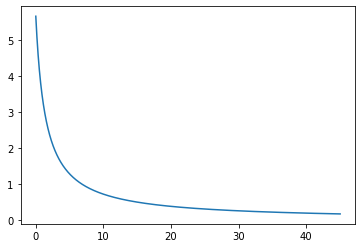

In [99]:
alpha = 0.001
typw = np.sqrt(1.0 / np.sqrt(alpha))
# computing eta0, the initial learning rate
initial_eta0 = typw / max(1.0, clf.loss_function_.dloss(-typw, 1.0))
# initialize t such that eta at first sample equals eta0
optimal_init = 1.0 / (initial_eta0 * alpha)

t = np.arange(5400)
eta = 1.0 / (alpha * (optimal_init + t - 1))
plt.plot(t / len(train_indices), eta)

In [66]:
sklearn.metrics.log_loss(y[valid_indices], clf.predict_proba(X[valid_indices]))

0.9704663586498072

In [64]:
sklearn.metrics.log_loss

## Analysis